## Description
In the follwoing notebook, the csv data file for KfZ-Zulassung is read to create various visualizations which will be used later to be combind with the hail data.


* [Necessary Python libraries](#python_libraries)

* [Reading interim data](#reading_data)

* [Data Visualization for KfZ Data](#data_visualization)


<a id="python_libraries"></a>
## Necessary Python libraries

In [33]:
# Loading necessary libraries in Python
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
! pip install plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'

Defaulting to user installation because normal site-packages is not writeable


In [35]:
! pip install seaborn==0.12.2
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable


In [36]:
# This is needed for the grid visualization later
from mpl_toolkits.axes_grid1 import ImageGrid

<a id="reading_data"></a>
## Reading the interim data

In [37]:
processed_data_path = Path("./data/processed")
kfz_data = pd.read_csv(processed_data_path/'interim_kfz_data.csv', sep=";")

In [38]:
kfz_data['Jahr'] = pd.to_datetime(kfz_data['Jahr'], format='%Y').dt.strftime('%Y')

In [39]:
kfz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Kanton     468 non-null    object
 1   Jahr       468 non-null    object
 2   Total_KFZ  468 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.1+ KB


In [40]:
kfz_data.head()

,Kanton,Jahr,Total_KFZ
0,AG,2005,311370
1,AG,2006,316298
2,AG,2007,321731
3,AG,2008,327074
4,AG,2009,329151


In [41]:
# To better see the data, the datafrae is sorted based on The "Kanton" and "Jahr"
#kfz_data.sort_values(['Kanton','Jahr'], ascending=[True, False])

<a id="data_visualization"></a>
## Data Visualization for the KFZ data

In [45]:
# create a line chart of Total_KFZ over time for each canton
fig = px.line(kfz_data, x='Jahr', y='Total_KFZ', color='Kanton', hover_data=['Kanton'])
fig.update_layout(title='Total Number of Cars over Time by Canton', xaxis_title='Year', yaxis_title='Total Number of Cars')
fig.update_traces(mode='lines')
fig.update_layout(legend_title='Canton', legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5))
fig.show()

In [46]:
# create a stacked area chart of Total_KFZ over time for all cantons
fig = px.area(kfz_data, x='Jahr', y='Total_KFZ', color='Kanton', hover_data=['Kanton'])
fig.update_layout(title='Total Number of Cars over Time by Canton', xaxis_title='Year', yaxis_title='Total Number of Cars')
fig.update_layout(legend_title='Canton', legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='center', x=0.5))
fig.show()

<div class="alert alert-block alert-info">
Next a series of 18 heatmap plots in a grid format is developed to show change of total car number through out the years.</div> 

In [19]:
! pip install geopandas

import geopandas as gpd
from mpl_toolkits.axes_grid1 import ImageGrid

Defaulting to user installation because normal site-packages is not writeable


In [20]:
# read the data into a DataFrame
df = kfz_data

shape_file_path = Path("./data/Swiss_shape_files/")
shape_file = "swissBOUNDARIES3D_1_4_TLM_KANTONSGEBIET.shp"

# Join the path and file name using the Path object
fp = str(shape_file_path / shape_file)

# read the shapefile of Swiss cantons into a GeoDataFrame
canton_map = gpd.read_file(fp)


In [21]:
canton_map['NAME'].unique()

array(['Graubünden', 'Bern', 'Valais', 'Vaud', 'Ticino', 'St. Gallen',
       'Zürich', 'Fribourg', 'Luzern', 'Aargau', 'Uri', 'Thurgau',
       'Schwyz', 'Jura', 'Neuchâtel', 'Solothurn', 'Glarus',
       'Basel-Landschaft', 'Obwalden', 'Nidwalden', 'Genève',
       'Schaffhausen', 'Appenzell Ausserrhoden', 'Zug',
       'Appenzell Innerrhoden', 'Basel-Stadt'], dtype=object)

The names of canton are changed to abbreviation to match the information in the KFZ dataframe

In [22]:
cantons = {
    'Zürich': 'ZH',
    'Bern': 'BE',
    'Luzern': 'LU',
    'Uri': 'UR',
    'Schwyz': 'SZ',
    'Obwalden': 'OW',
    'Nidwalden': 'NW',
    'Glarus': 'GL',
    'Zug': 'ZG',
    'Fribourg': 'FR',
    'Solothurn': 'SO',
    'Basel-Stadt': 'BS',
    'Basel-Landschaft': 'BL',
    'Schaffhausen': 'SH',
    'Appenzell Ausserrhoden': 'AR',
    'Appenzell Innerrhoden': 'AI',
    'St. Gallen': 'SG',
    'Graubünden': 'GR',
    'Aargau': 'AG',
    'Thurgau': 'TG',
    'Ticino': 'TI',
    'Vaud': 'VD',
    'Valais': 'VS',
    'Neuchâtel': 'NE',
    'Genève': 'GE',
    'Jura': 'JU'
}

canton_map = canton_map.replace({'NAME':cantons})

In [23]:
#A check to make sure the transformaiton has been done.
canton_map['NAME'].unique()

array(['GR', 'BE', 'VS', 'VD', 'TI', 'SG', 'ZH', 'FR', 'LU', 'AG', 'UR',
       'TG', 'SZ', 'JU', 'NE', 'SO', 'GL', 'BL', 'OW', 'NW', 'GE', 'SH',
       'AR', 'ZG', 'AI', 'BS'], dtype=object)

In [24]:
# join the data with the shapefile by canton name
canton_data = canton_map.merge(df, left_on='NAME', right_on='Kanton')

In [25]:
#canton_data.loc[canton_data['NAME'] == 'ZH']

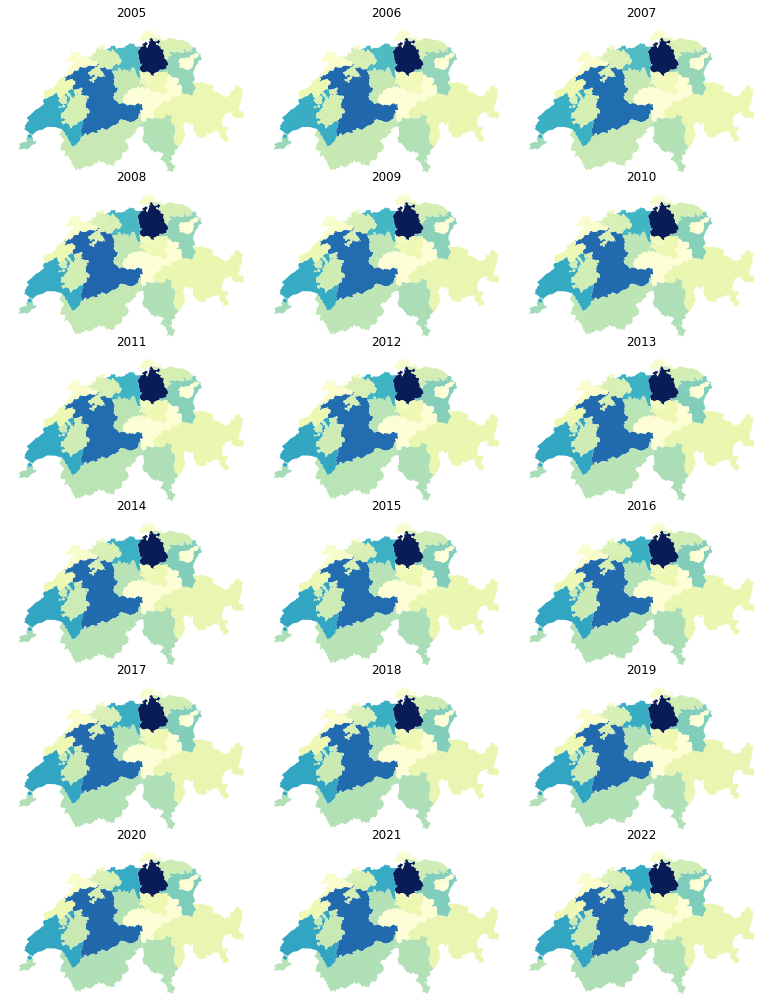

In [26]:
# create a grid of subplots for each year
fig = plt.figure(figsize=(18, 18))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 3), axes_pad=0.1)

# loop over each year and create a heatmap on the corresponding subplot
years = df['Jahr'].unique()
for i, year in enumerate(years):
    year_data = canton_data[canton_data['Jahr']==year]
    ax = grid[i]
    ax.axis('off')
    ax.set_title(str(year))
    year_data.plot(column='Total_KFZ', cmap='YlGnBu', linewidth=0.1, ax=ax, 
                   legend=False, legend_kwds={'label': 'Total Number of Cars'})

plt.show()


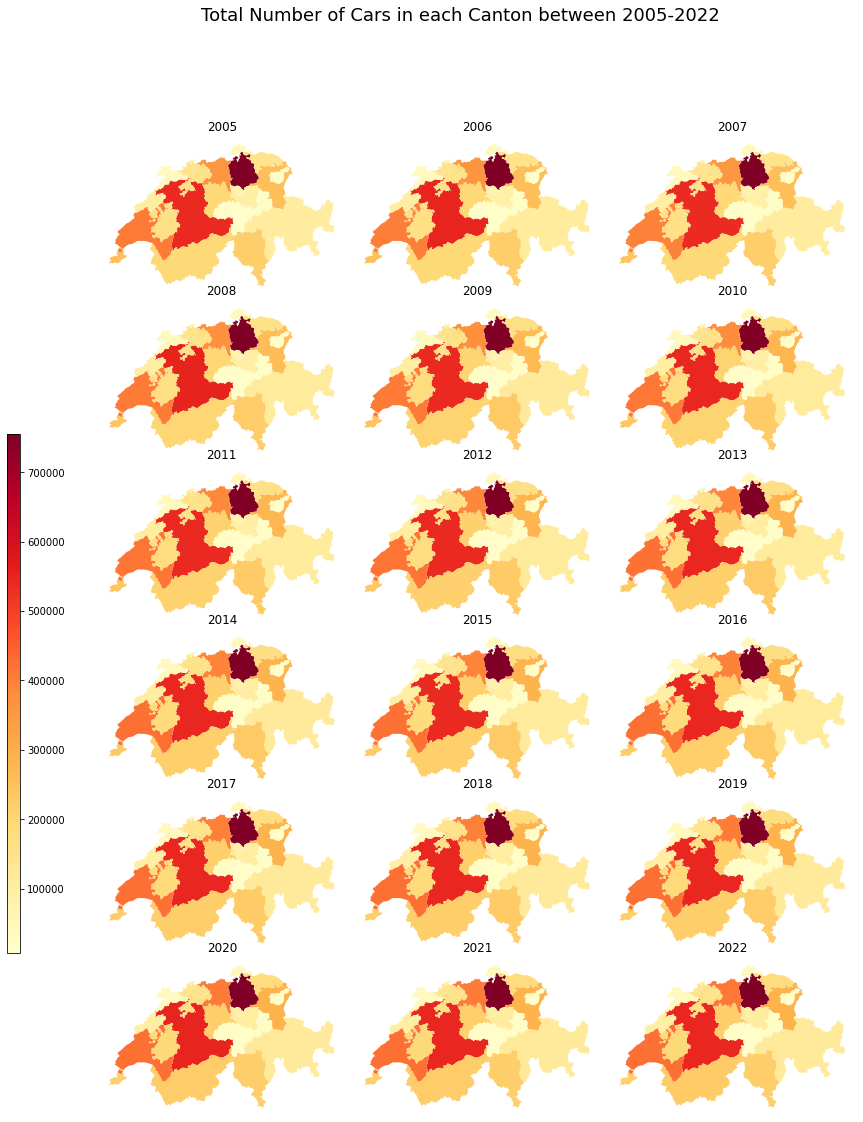

In [27]:
# create a grid of subplots for each year
# Set the range for the choropleth
title = 'Total Number of Cars in each Canton between 2005-2022'
col = 'Total_KFZ'
#source = 'Source: ...'
vmin = canton_data[col].min()
vmax = canton_data[col].max()
cmap = 'YlOrRd'

fig = plt.figure(figsize=(18, 18))
grid = ImageGrid(fig, 111, nrows_ncols=(6, 3), axes_pad=0.1)


# loop over each year and create a heatmap on the corresponding subplot
years = df['Jahr'].unique()
for i, year in enumerate(years):
    year_data = canton_data[canton_data['Jahr']==year]
    ax = grid[i]
    ax.axis('off')
    ax.set_title(str(year))
    year_data.plot(column=col, cmap=cmap, linewidth=1, ax=ax)
    
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

fig.suptitle(title, fontsize=18)

plt.show()


As an example for a single year, the heatmap is created for the last year in the dataframe, i.e., 2022.

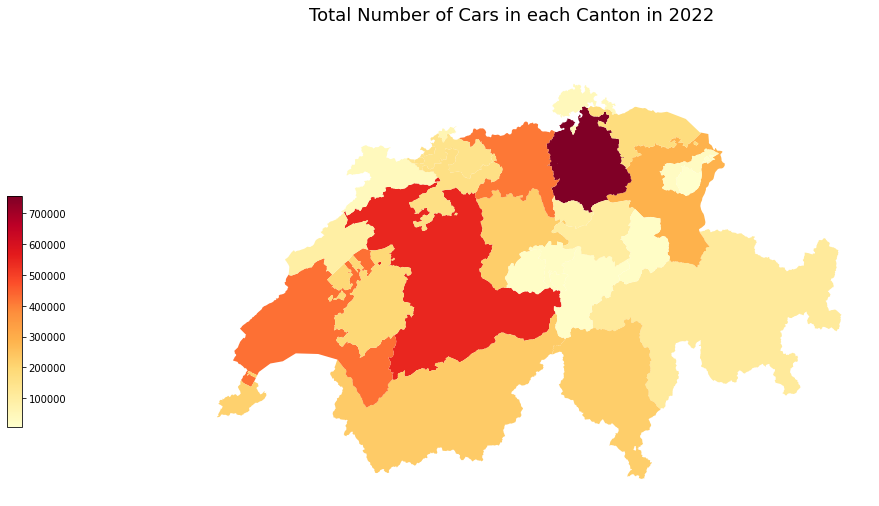

In [28]:
title = 'Total Number of Cars in each Canton in 2022'
col = 'Total_KFZ'
#source = 'Source: ...'
vmin = canton_data[col].min()
vmax = canton_data[col].max()
cmap = 'YlOrRd'

fig, ax = plt.subplots(1, figsize=(20, 8))
#grid = ImageGrid(fig, 111, nrows_ncols=(6, 3), axes_pad=0.1)


# loop over each year and create a heatmap on the corresponding subplot
#years = df['Jahr'].unique()
#for i, year in enumerate(years):
year_data = canton_data[canton_data['Jahr']=='2022']
ax.axis('off')
year_data.plot(column=col, cmap=cmap, linewidth=1, ax=ax)
    
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap=cmap)
# Empty array for the data range
sm._A = []
# Add the colorbar to the figure
cbaxes = fig.add_axes([0.15, 0.25, 0.01, 0.4])
cbar = fig.colorbar(sm, cax=cbaxes)

fig.suptitle(title, fontsize=18)

plt.show()
